<a href="https://colab.research.google.com/github/mariaaslam706/Mice-Protein/blob/main/Copy_of_mice_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd           # for data manipulation
import numpy as np            # for numerical operations
from sklearn.impute import SimpleImputer  # for imputing missing values
import seaborn as sns         # for correlation plots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

! pip install plotly
import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
# Set seed for reproducibility
np.random.seed(56775)

In [ ]:
df = pd.read_csv("/content/Data_Cortex_Nuclear.csv")
df = df.drop(columns=['MouseID'])


In [ ]:
for col in ['Genotype', 'Treatment', 'Behavior', 'class']:
    df[col], _ = pd.factorize(df[col])


In [ ]:
df['Genotype'].value_counts()

Genotype
0    570
1    510
Name: count, dtype: int64

In [ ]:
cor_df = df.corr()  # take the correlation from the data
corr = cor_df.loc['Genotype','class'] # only single value

In [ ]:
col1, col2 = "Genotype", "class"
corr = df[col1].corr(df[col2])
print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  Genotype  and  class is:  0.87


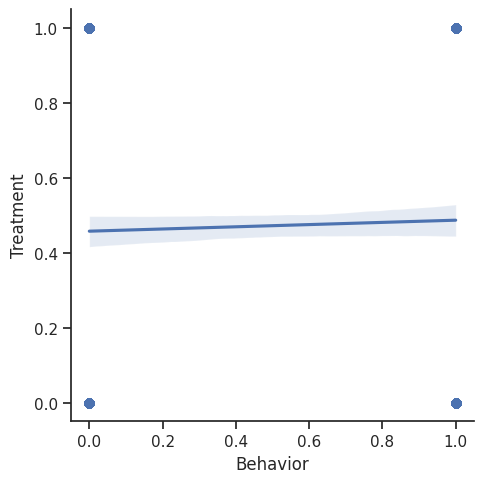

In [ ]:
sns.lmplot(x="Behavior", y="Treatment", data=df);

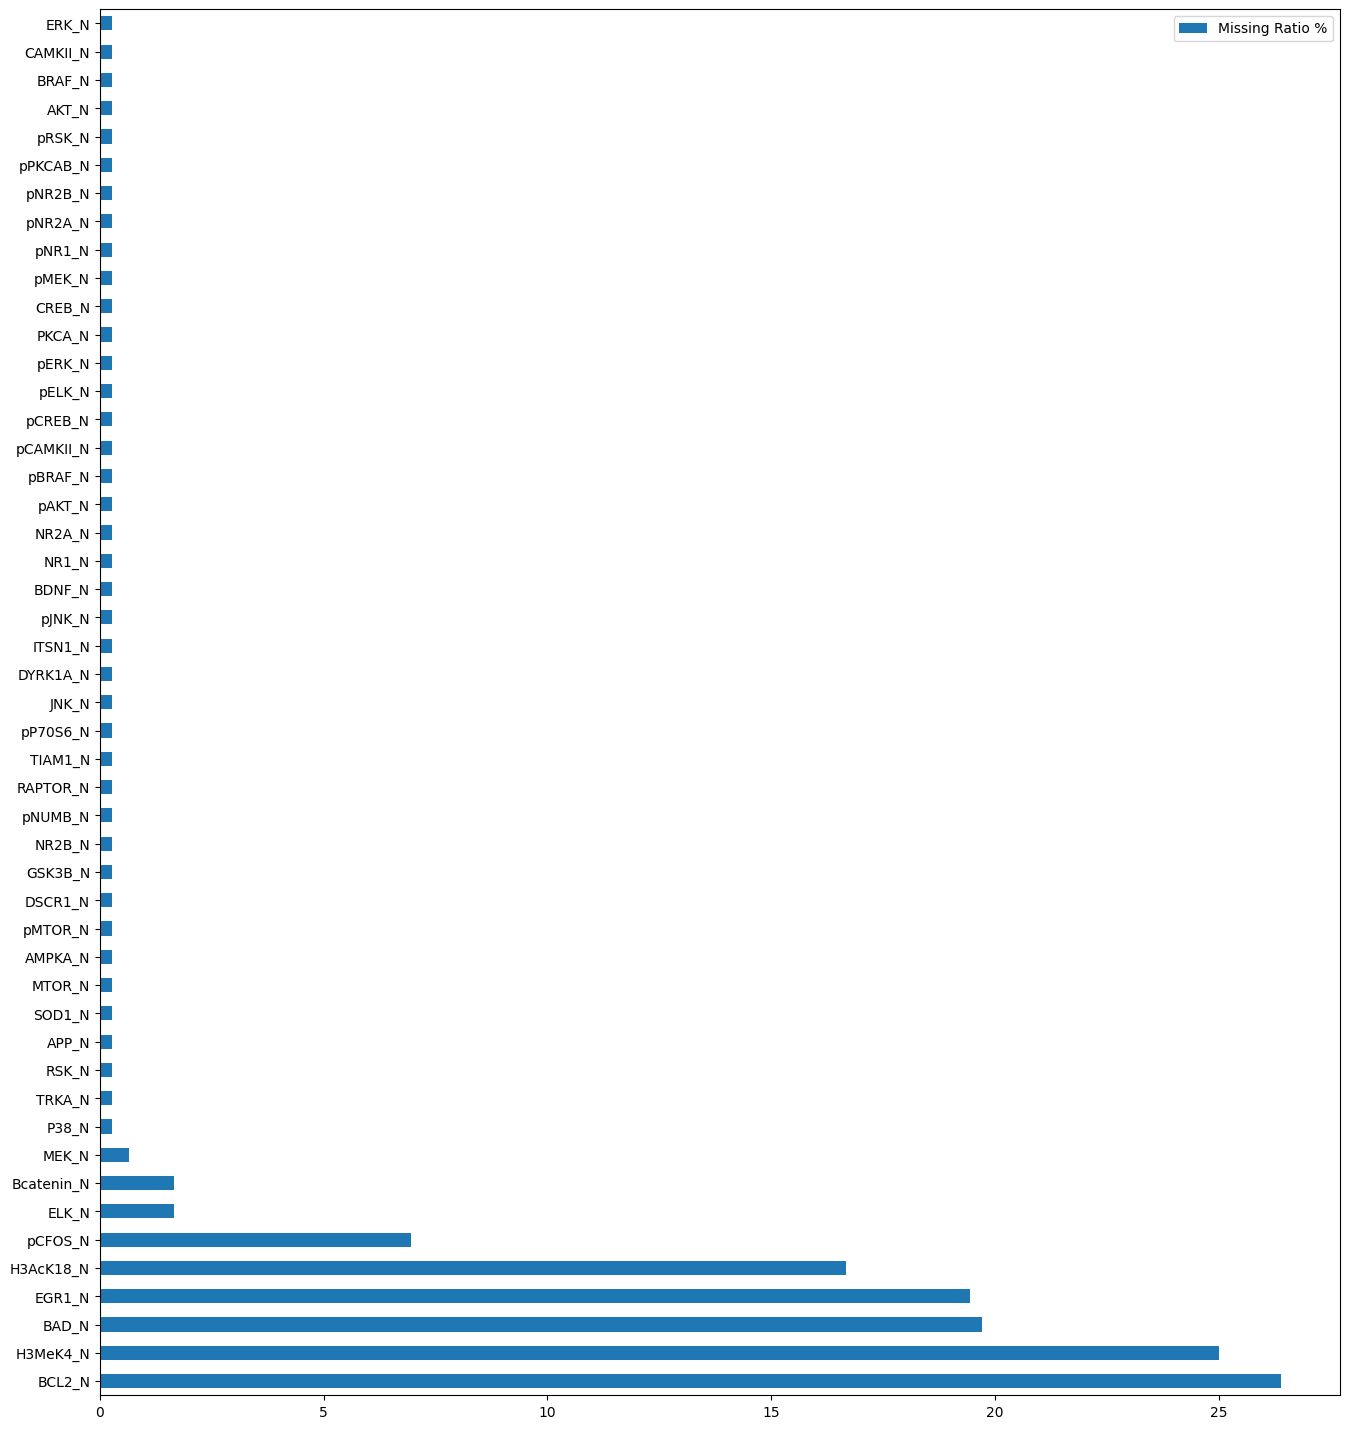

In [ ]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plot_nas(df)

<Axes: >

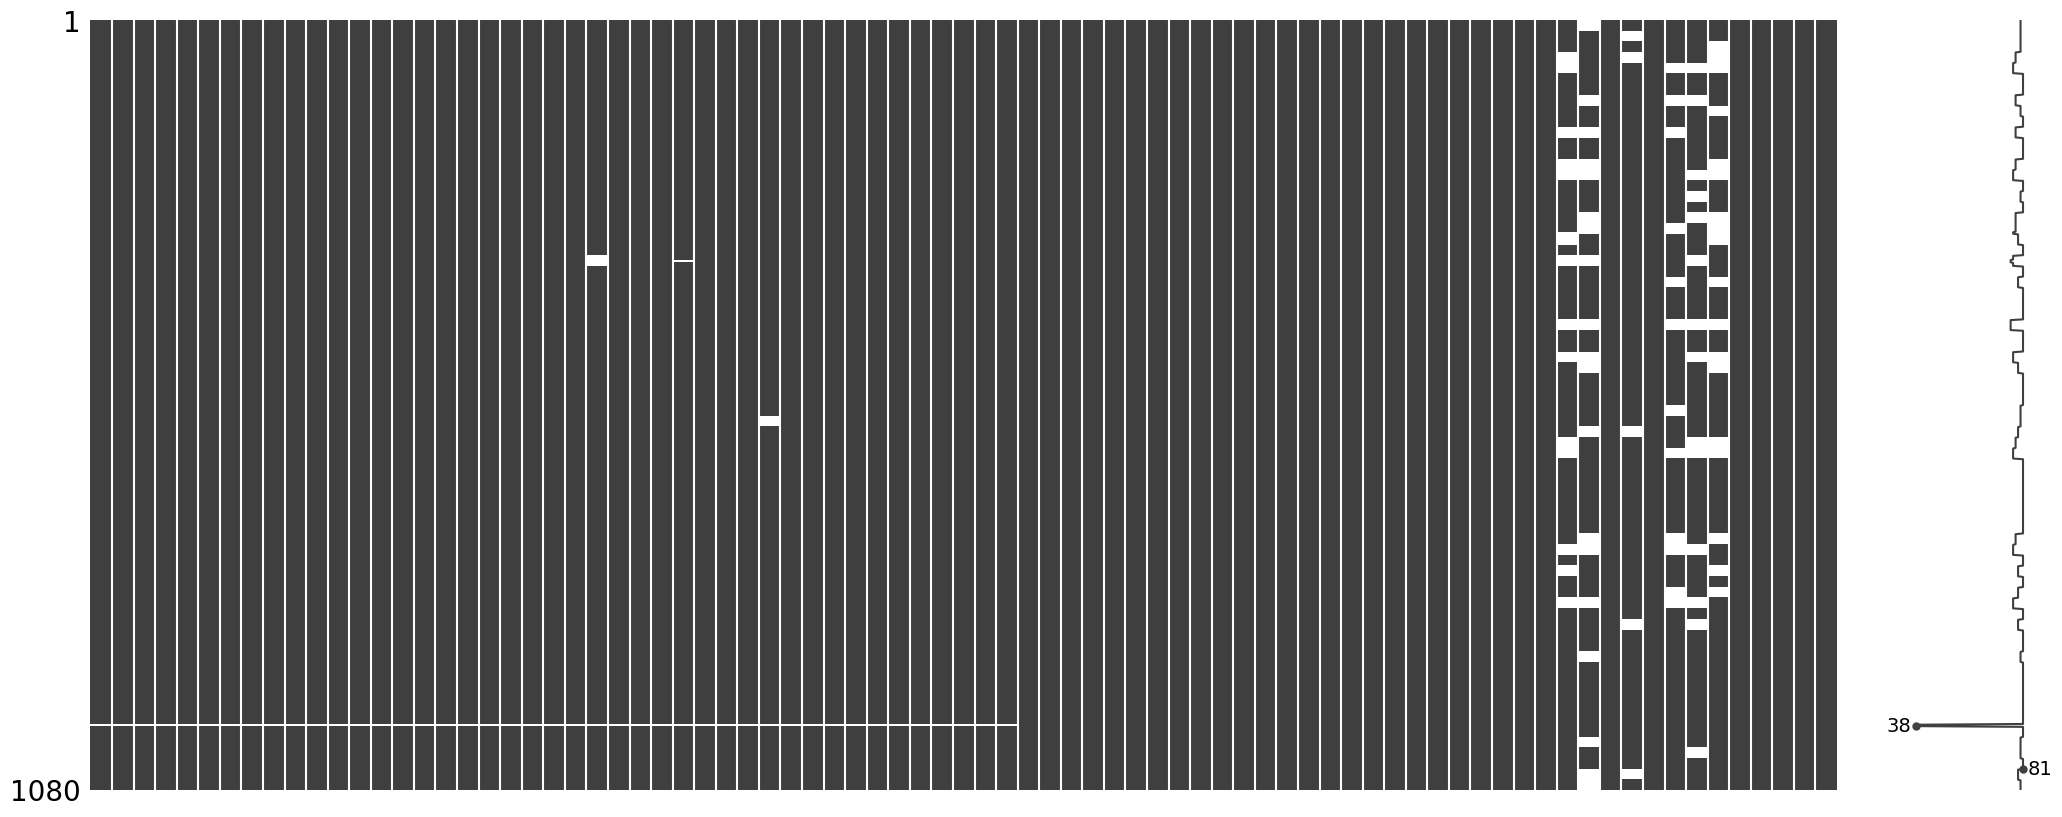

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.dropna(axis=0, thresh=50)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,1,1,1,7
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,1,1,1,7
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,1,1,1,7
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,1,1,1,7


In [ ]:
!pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00


In [ ]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = df,
save_all_iterations = True,
random_state = 2023
)

In [ ]:
mice_kernel.mice(2)
df = mice_kernel.complete_data()
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0,0,0


<Axes: >

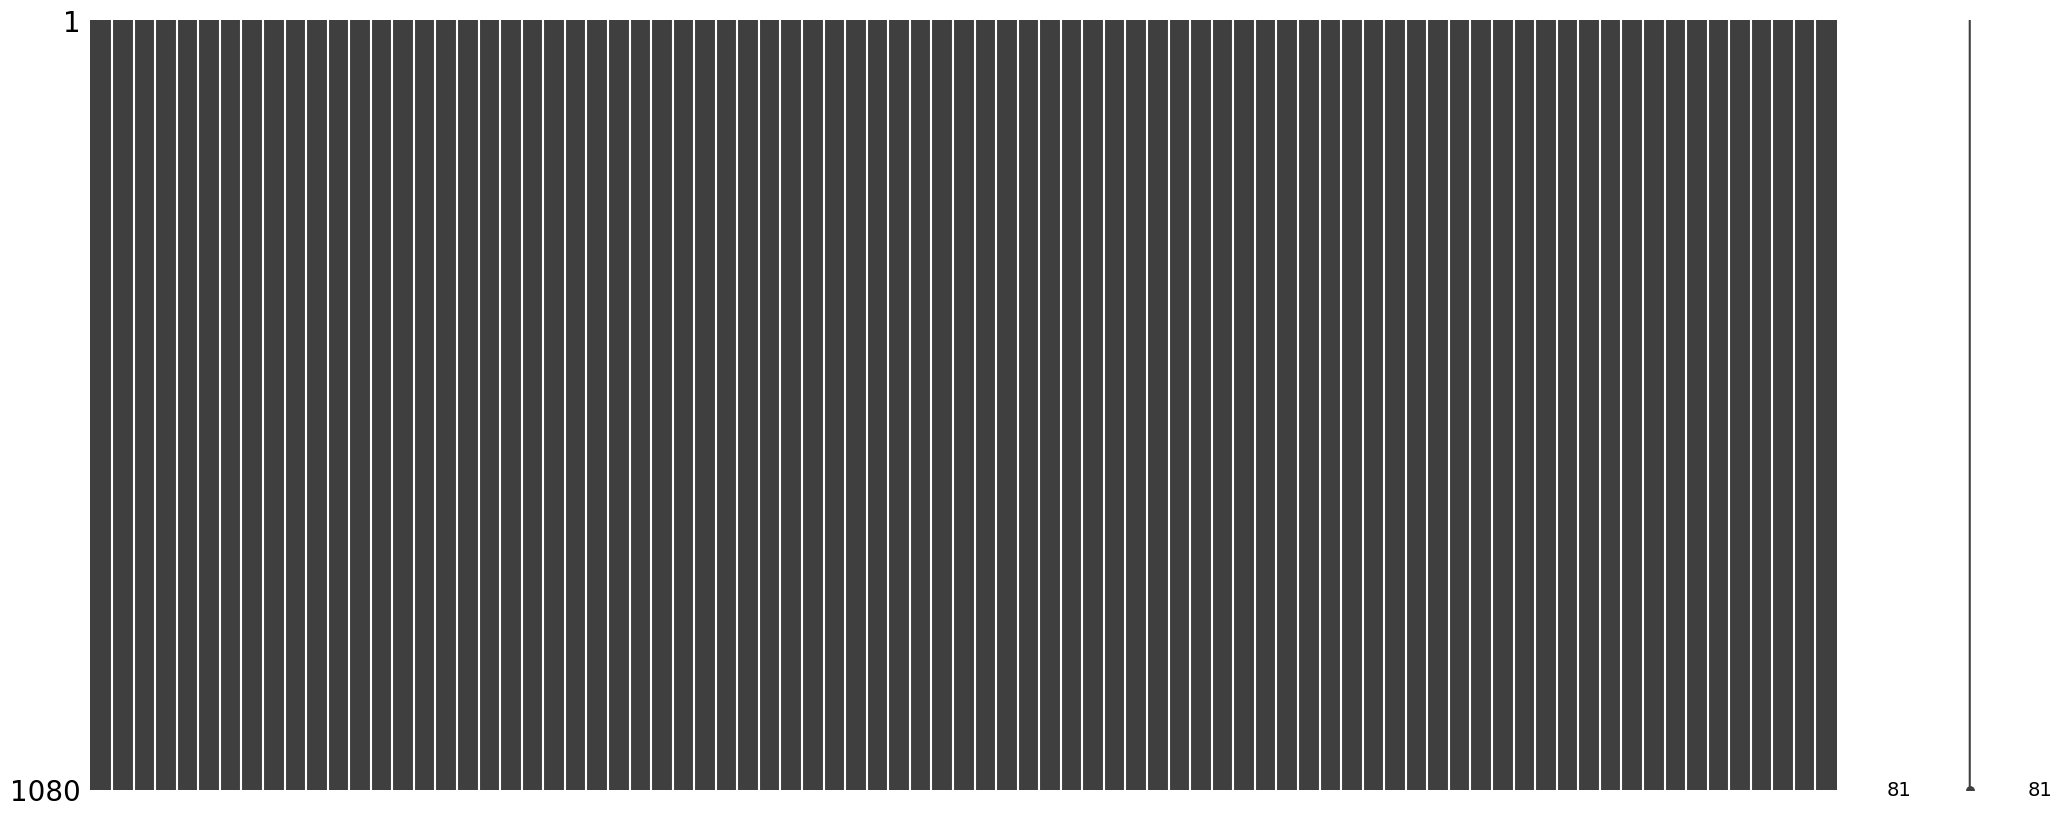

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
m = len(df.columns)
cor_matrix = df.iloc[:, :-4].corr()
print(m)

81


In [ ]:
# Calculate the number of correlations greater than 0.8
num_high_correlations_08 = np.sum(np.abs(cor_matrix.values) > 0.8) / 2 + 0.5
print("Number: Correlations between proteins > 0.8")
print(num_high_correlations_08)

# Calculate the number of correlations greater than 0.5
num_high_correlations_05 = np.sum(np.abs(cor_matrix.values) > 0.5) / 2 + 0.5
print("Number: Correlations between proteins > 0.5")
print(num_high_correlations_05)

Number: Correlations between proteins > 0.8
86.0
Number: Correlations between proteins > 0.5
432.0


In [ ]:
# Select the last four columns
last_four_columns = df.iloc[:, -4:]

# Compute the correlation matrix
correlation_matrix = last_four_columns.corr()

print(correlation_matrix)

           Genotype  Treatment  Behavior     class
Genotype   1.000000  -0.003096  0.029378  0.871617
Treatment -0.003096   1.000000  0.029378  0.436982
Behavior   0.029378   0.029378  1.000000  0.255085
class      0.871617   0.436982  0.255085  1.000000


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca = PCA().fit(df)

X_pca = pca.transform(df)

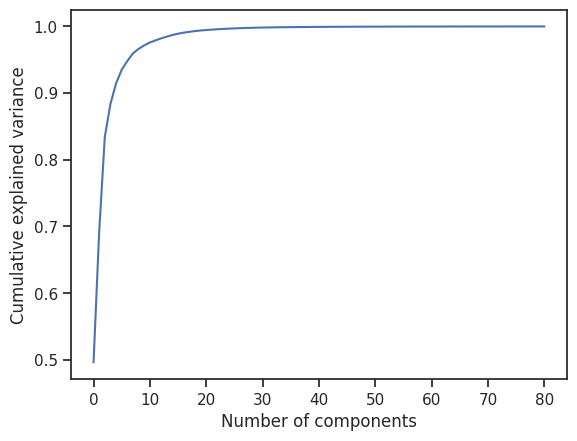

In [ ]:
# Calculate the cumulative explained variance ratio for each component
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio as a function of the number of components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
## Reduce it to 3 dimension
pca3 = PCA(n_components = 3)

X_pca3 = pca3.fit_transform(df)
X_principal3 = pd.DataFrame(X_pca3)

X_principal3

,0,1,2
0,-3.740313,1.007783,2.434847
1,-3.701067,0.612511,2.170438
2,-3.690382,0.583475,2.183397
3,-3.591236,-0.245718,1.516155
4,-3.557684,-0.470485,1.343655
...,...,...,...
1075,3.948955,-1.681496,-0.327747
1076,3.923746,-1.493811,-0.189612
1077,3.990194,-2.586343,-0.545712
1078,3.974085,-2.309044,-0.448428


In [ ]:
#TSNE

tsne = TSNE(n_components=3, random_state=42)
tsne_embedding = tsne.fit_transform(df)

tsne_embedding = pd.DataFrame(tsne_embedding)
tsne_embedding.shape

(1080, 3)

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

In [ ]:
def tsne_3D_plot( tsne_principal, color , title):
    fig = px.scatter_3d(x = tsne_principal.iloc[:,0],
                        y = tsne_principal.iloc[:,1],
                        z = tsne_principal.iloc[:,2],

                        color = color,
                        title = title,
                       opacity = 1)

    fig.update_traces(marker=dict(size=3.5,
                                  line=dict(width=0.5,
                                            color='Black')),
                      selector=dict(mode='markers'))
    fig.show()

In [ ]:
df.rename(columns={'Genotype':'Genotype'}, inplace=True)

In [ ]:
tsne_3D_plot(tsne_embedding, color = df.Genotype, title = "t-SNE Visualization")

In [ ]:
# Split train test data set for multi classification
X_train, X_test, y_train, y_test = train_test_split(tsne_embedding, df.Class, test_size=0.3, random_state=1)

NameError: name 'tsne_embedding' is not defined

In [ ]:
#Seperate the labels
X= df.drop(['Genotype', 'Treatment', 'Behavior', 'Class'], axis=1)
y = df['Genotype']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Genotype, dtype: int64

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy of Random Forest Model :', round(accuracy,3))

Accuracy of Random Forest Model : 1.0


In [ ]:
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy of Random Forest Model :', round(accuracy,3))

Accuracy of Random Forest Model : 1.0


In [ ]:
!pip install explainerdashboard
!pip install graphviz
!pip install dalex
import dalex as dx
from explainerdashboard import RegressionExplainer, ExplainerDashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042471 sha256=3b8fd4b2d715df9e57cbfd7dc2f76482bf86bf6f3092df22f536a440b1c6d797
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e7

In [ ]:
#######Dalex XAI#######
exp = dx.Explainer(rf2,X_train,y_train)
#Model performance metrix
exp.model_performance()

Preparation of a new explainer is initiated

  -> data              : 864 rows 77 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 864 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7ec6f92731c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.474, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.33, mean = -0.00199, max = 0.36
  -> model_info        : package sklearn

A new explainer has been created!


,mse,rmse,r2,mae,mad
RandomForestRegressor,0.006326,0.079534,0.974619,0.051343,0.03


In [ ]:
explainer = RegressionExplainer(rf2, X_test, y_test)
db = ExplainerDashboard(explainer)
db.run(port=8050)

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning: JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.


Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ExplainerDashboard.terminate(8050)

NameError: name 'ExplainerDashboard' is not defined

In [ ]:
expression_level_means = melt_df.groupby(by=['variable']).max().reset_index()
expression_level_means.head()

,variable,Genotype,Treatment,Behavior,class,value
0,ADARB1_N,1,1,1,7,2.539890
1,AKT_N,1,1,1,7,1.182175
2,AMPKA_N,1,1,1,7,0.700839
3,APP_N,1,1,1,7,0.632663
4,ARC_N,1,1,1,7,0.158748


In [ ]:
#######Dalex XAI#######
exp = dx.Explainer(rf2,X_train,y_train)
#Model performance metrix
exp.model_performance()

Preparation of a new explainer is initiated

  -> data              : 864 rows 77 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 864 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x7ec6f92731c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.474, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.33, mean = -0.00199, max = 0.36
  -> model_info        : package sklearn

A new explainer has been created!


,mse,rmse,r2,mae,mad
RandomForestRegressor,0.006326,0.079534,0.974619,0.051343,0.03


In [ ]:
exp.model_parts()

,variable,dropout_loss,label
0,_full_model_,0.079534,RandomForestRegressor
1,NUMB_N,0.080345,RandomForestRegressor
2,BAD_N,0.080385,RandomForestRegressor
3,pMEK_N,0.080635,RandomForestRegressor
4,pCFOS_N,0.080680,RandomForestRegressor
...,...,...,...
74,pNUMB_N,0.120355,RandomForestRegressor
75,GluR3_N,0.140907,RandomForestRegressor
76,AMPKA_N,0.219597,RandomForestRegressor
77,APP_N,0.454336,RandomForestRegressor


In [ ]:
exp.model_parts().plot()

In [ ]:
rf2.estimator_

DecisionTreeRegressor()

In [ ]:
from sklearn import tree
from dtreeviz import *

In [ ]:
plt.figure(figsize=(100,100))
_ = tree.plot_tree(rf2.estimators_[5], feature_names=X_train.columns, filled=True)